In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
import seaborn as sns
import statsmodels.api as sm
import json

In [2]:
'''At this point, job_growth data is insubstantial and not stretching over our corpus of data.  All areas that will need to be modified
when this changes are indicated with a #TODO_JG comment.'''

'At this point, job_growth data is insubstantial and not stretching over our corpus of data.  All areas that will need to be modified\nwhen this changes are indicated with a #TODO_JG comment.'

In [3]:
#data_source = '../Money-Mavericks/data/data.csv'
data_source = './data/data.csv'
df = pd.read_csv(data_source)
print(df.head())

        State  Education Budget  Unemployment Rate  Population Estimate  \
0     Alabama      5.577678e+08                4.6              4447207   
1      Alaska      1.778816e+08                6.6               626933   
2     Arizona      6.679765e+08                3.9              5130247   
3    Arkansas      3.284035e+08                4.4              2673293   
4  California      3.792097e+09                4.9             33871653   

   SNAPS household_participants  SNAPS individual_participants    SNAPS cost  \
0                   156104.5833                   3.960572e+05  3.437353e+08   
1                    13208.3333                   3.752433e+04  4.583456e+07   
2                    95567.5000                   2.590026e+05  2.402456e+08   
3                    98764.3333                   2.465715e+05  2.062364e+08   
4                   672007.0000                   1.830677e+06  1.639333e+09   

   SNAPS cost_per_person  SNAPS cost_per_household  Year  
0        

In [4]:
'''Here, we read in a given cluster. For the sake of this, the code was pre-emptively written to expect a 2D array
Each nested array will be considered a cluster, and will contain the names of all the states contained within the cluster.
Should this change, our code will be editted to reflect this.  All areas where the cluster data are used will be marked with a #TODO_CLUSTER
comment for easy lookup.'''

'Here, we read in a given cluster. For the sake of this, the code was pre-emptively written to expect a 2D array\nEach nested array will be considered a cluster, and will contain the names of all the states contained within the cluster.\nShould this change, our code will be editted to reflect this.  All areas where the cluster data are used will be marked with a #TODO_CLUSTER\ncomment for easy lookup.'

In [9]:
#TODO_CLUSTER
cluster_source = './data/clustered_states.json'
with open(cluster_source, 'r') as fp:
    data = json.load(fp)

clusters = []

for key, value in data.items():
    if(len(value) > 2):
        clusters.append(value)

print(clusters)

[['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Florida', 'Georgia', 'Illinois', 'Kentucky', 'Louisiana', 'Maine', 'Michigan', 'Mississippi', 'Nevada', 'New Mexico', 'New York', 'North Carolina', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'Tennessee', 'Texas', 'Washington', 'West Virginia'], ['Colorado', 'Connecticut', 'Delaware', 'Hawaii', 'Idaho', 'Indiana', 'Iowa', 'Kansas', 'Maryland', 'Massachusetts', 'Minnesota', 'Missouri', 'Montana', 'Nebraska', 'New Hampshire', 'New Jersey', 'North Dakota', 'South Dakota', 'Utah', 'Vermont', 'Virginia', 'Wisconsin', 'Wyoming'], ['District of Columbia']]


In [10]:
#Now for each cluster we create a separate x and y

In [11]:
df_by_cluster = []
for cluster in clusters:
    c_df = df.loc[df['State'].isin(cluster), :].copy()
    c_df = c_df.sample(frac=1).reset_index().drop(columns='index')
    x = c_df[["State", "Education Budget", "Unemployment Rate", "Population Estimate", "Year"]] #TODO_JG
    x = pd.get_dummies(data=x, drop_first=True)
    y = c_df["SNAPS cost"]
    df_by_cluster.append([x,y])

In [12]:
#Now that that's created, we're going to loop over each cluster and individually create a linear regression model for them.  

In [17]:
print(df_by_cluster[1])

[     Education Budget  Unemployment Rate  Population Estimate  Year  \
0        1.960014e+09                3.8              2982644  2007   
1        3.188148e+08                4.0               638168  2003   
2        2.780372e+09                3.9              5450623  2015   
3        3.770574e+09                3.3              5639632  2019   
4        1.320282e+09                8.5              5640996  2009   
..                ...                ...                  ...   ...   
478      2.668430e+09                3.0              7673725  2007   
479      4.392252e+09                5.6              5376643  2012   
480      3.708829e+08                2.7              4302086  2000   
481      3.751823e+08                7.3               907381  2011   
482      1.500114e+08                4.9              1293957  2000   

     State_Connecticut  State_Delaware  State_Hawaii  State_Idaho  \
0                    0               0             0            0   
1       

In [13]:
#setting up globals
cluster_models = []
cluster_parameters = [] #expecting [x_train, x_test, y_train, y_test]
cluster_predictions = []
cluster_ls = []

In [14]:
'''Now it's just linear regression, straight up and down.'''

"Now it's just linear regression, straight up and down."

CLUSTER 1 --------------------------------------------
contains: ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Florida', 'Georgia', 'Illinois', 'Kentucky', 'Louisiana', 'Maine', 'Michigan', 'Mississippi', 'Nevada', 'New Mexico', 'New York', 'North Carolina', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'Tennessee', 'Texas', 'Washington', 'West Virginia']
                            OLS Regression Results                            
Dep. Variable:             SNAPS cost   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     204.3
Date:                Thu, 27 Apr 2023   Prob (F-statistic):          1.28e-230
Time:                        12:26:20   Log-Likelihood:                -9570.5
No. Observations:                 453   AIC:                         1.920e+04
Df Residuals:                     422   B

ValueError: With n_samples=1, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

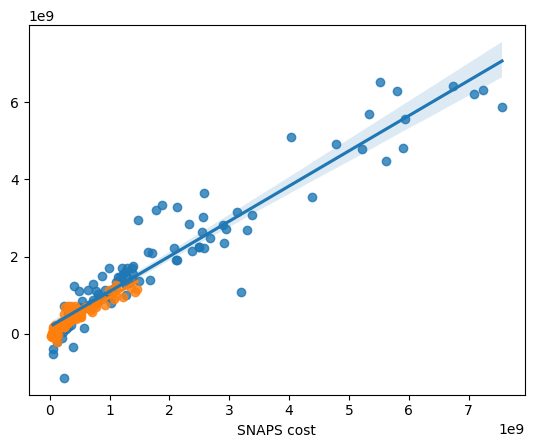

In [15]:
count = 1
for df_arr in df_by_cluster:
    print(f"CLUSTER {count} --------------------------------------------")
    print(f"contains: {clusters[count - 1]}")
    x = df_arr[0]
    y = df_arr[1]
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)
    
    model = LinearRegression()
    model.fit(X_train,y_train)
    
    predictions = model.predict(X_test)

    sns.regplot(x=y_test,y=predictions)
    
    X_train_Sm= sm.add_constant(X_train)
    X_train_Sm= sm.add_constant(X_train)
    ls=sm.OLS(y_train,X_train_Sm).fit()
    print(ls.summary())
    
    cluster_models.append(model)
    cluster_parameters.append([X_train, X_test, y_train, y_test])
    cluster_predictions.append(predictions)
    cluster_ls.append(ls)